## Grundlagen GeoPandas

**GeoPandas**
- erbt Funktionen von Pandas, damit ist eine sehr mächtige Tabellenkalkulation möglich
- kann sehr viele Datenformate Lesen und Schreiben, da es auf Fiona und somit auf GDAL aufbaut
- verfügt die wichtigsten Overlay-Funktionen wie **intersection**, **union**, **difference** und andere
- verfügt über die wichtigsten geometrischen Manipulationsmethoden wie **buffer**, **centroid**, **convex_hull** und weitere
- kennt die wichtigsten affinen Transformationen wie **rotate**, **scale**, **transform**, **affine_transform (matrix)**
- ist sehr schnell bei Berechnungen und Umwandlungen, da diese nicht zeilenbasiert sondern matrixbasiert durchgeführt werden, insbesondere Laden, Joinen und gruppieren von Daten.

### Datenformate

In [14]:
# Unterstützte Datenformate:
import fiona 
fiona.supported_drivers

{'AeronavFAA': 'r',
 'ARCGEN': 'r',
 'BNA': 'raw',
 'DXF': 'raw',
 'CSV': 'raw',
 'OpenFileGDB': 'r',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'GeoJSON': 'rw',
 'GeoJSONSeq': 'rw',
 'GPKG': 'rw',
 'GML': 'raw',
 'GPX': 'raw',
 'GPSTrackMaker': 'raw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'r',
 'S57': 'r',
 'SEGY': 'r',
 'SUA': 'r',
 'TopoJSON': 'r'}

<AxesSubplot:>

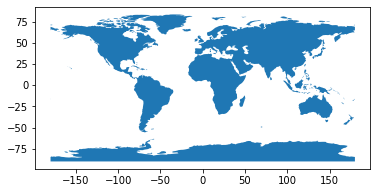

In [13]:
url = "http://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_110m_land.geojson"
df = gpd.read_file(url)
df.plot()

### Geschwindikeit:
Shapefile 'buildings_a.shp' mit 1 Mio. Zeilen laden (~320MB), eine neue Spalte anlegen und die Gebäudeflächen berechnen. Mit QGIS hat mein Rechner dafür 75 Sekunden mit dem Feldrechner benötigt, die Daten waren bereits in QGIS geladen.

In [4]:
import geopandas as gpd
import datetime #Performance messen
#Startzeitder Berechnung für Performancemessung
t1 = datetime.datetime.now()
#Daten einlesen
fp = "data/buildings_a.shp"
df = gpd.read_file(fp)

#Zwischenzeit nehmen
t2 = datetime.datetime.now()
secs = (t2-t1).total_seconds()
print("Reading data in {} seconds".format(secs))
t1 = datetime.datetime.now()

#Neue Spalte 'area' mit Gebäudefläche bestimmen:
df["area"] = df['geometry'].area

#Zeit berechnen für Flächenberechnung
t2 = datetime.datetime.now()
secs = (t2-t1).total_seconds()
print("Area-calculation done in {} seconds".format(secs))
df.head()

Reading data in 35.940476 seconds
Area-calculation done in 1.626247 seconds


,osm_id,code,fclass,name,type,geometry,area
0,4525597,1500,building,Sankt Thomas Kirche,church,"POLYGON ((411081.619 5318048.755, 411093.531 5...",245.943373
1,8010158,1500,building,Kirche St. Martin,church,"POLYGON ((430880.579 5276833.091, 430881.497 5...",1010.021333
2,8908823,1500,building,None,None,"POLYGON ((466315.023 5273762.395, 466347.839 5...",4213.850064
3,8908875,1500,building,None,None,"POLYGON ((466269.524 5273734.328, 466307.648 5...",2135.668509
4,8908942,1500,building,None,None,"POLYGON ((466381.453 5273734.571, 466430.771 5...",8935.539313


Mit der `describe()` Funktion können wir uns nun die Statistik zu den Daten sehr schnell ansehen:

In [6]:
df.describe()

,code,area
count,1016603.0,1.016603e+06
mean,1500.0,1.644109e+02
std,0.0,5.439604e+02
min,1500.0,5.501381e-02
25%,1500.0,4.589001e+01
50%,1500.0,9.993265e+01
75%,1500.0,1.669009e+02
max,1500.0,1.562510e+05
